In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn')

In [56]:
dia_data=pd.read_csv('diabetes.csv')
dia_data.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [57]:
dia_data.info(verbose=True)#查看一下信息，没有孔雀雉

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [58]:
dia_data.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [59]:
dia_data.shape

(768, 9)

0    500
1    268
Name: Outcome, dtype: int64


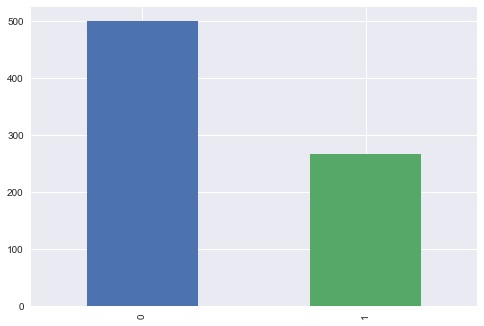

In [60]:
#查看标签分布
print(dia_data.Outcome.value_counts())
dia_data.Outcome.value_counts().plot(kind='bar')

E:\anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
E:\anaconda\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
E:\anaconda\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
E:\anaconda\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


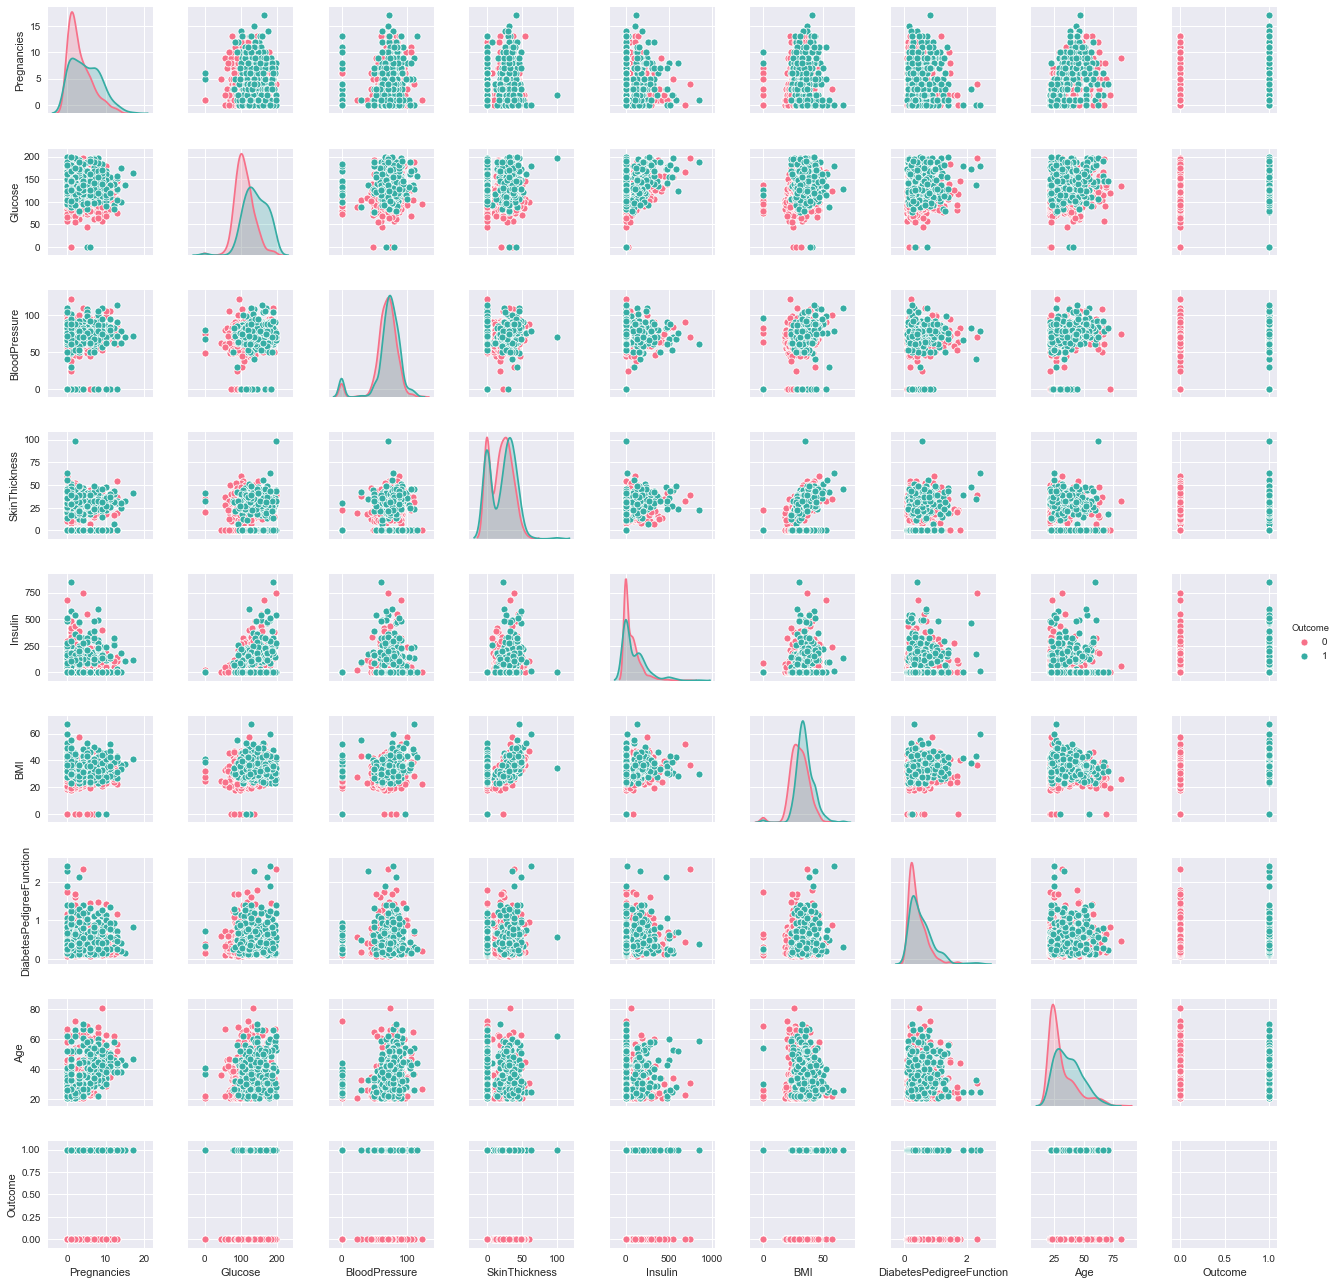

In [61]:
#sns.pairplot(dia_data,hue='Outcome')
g = sns.pairplot(dia_data,hue = 'Outcome', diag_kind = 'kde',height = 2,palette="husl");
plt.show()

In [62]:
#把0变成空值
colume=['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
dia_data[colume]=dia_data[colume].replace(0,np.nan)

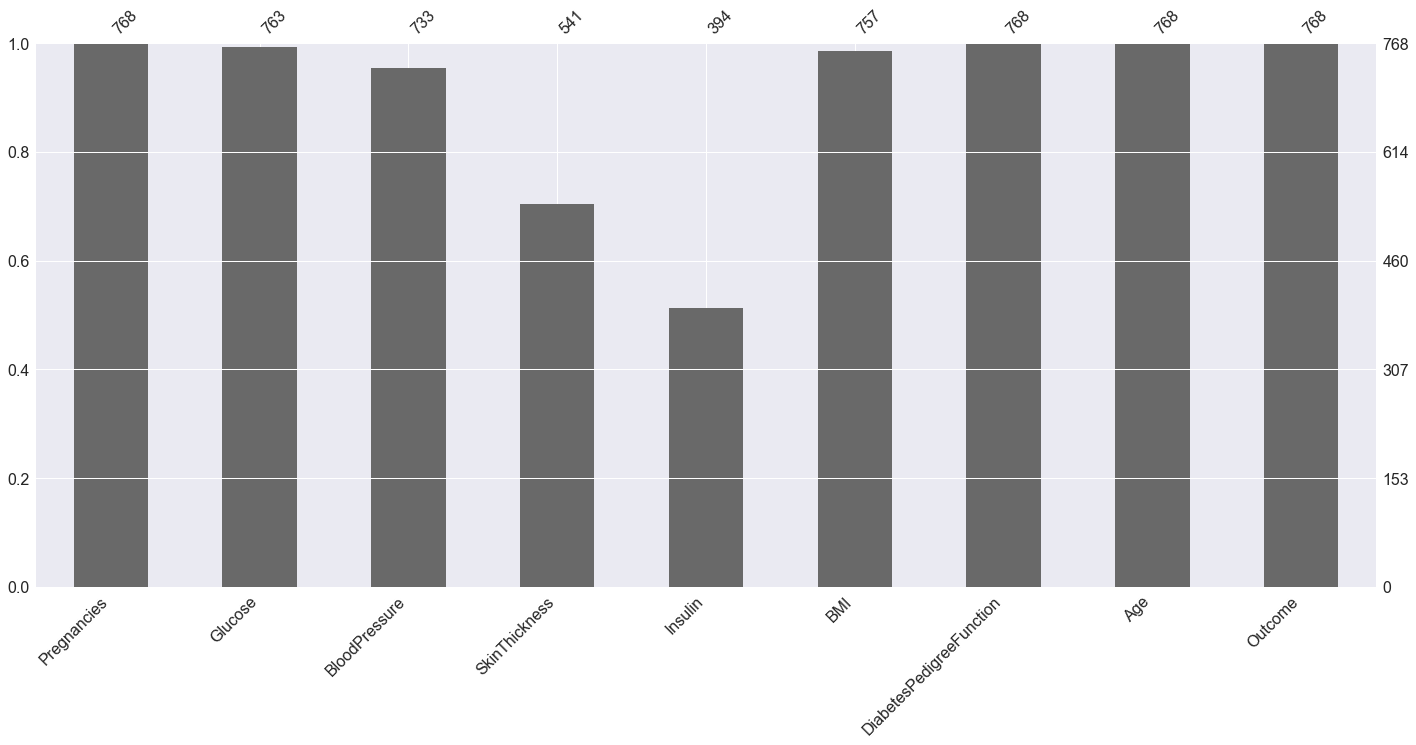

In [63]:
#空值分布
import missingno as msno
p=msno.bar(dia_data)


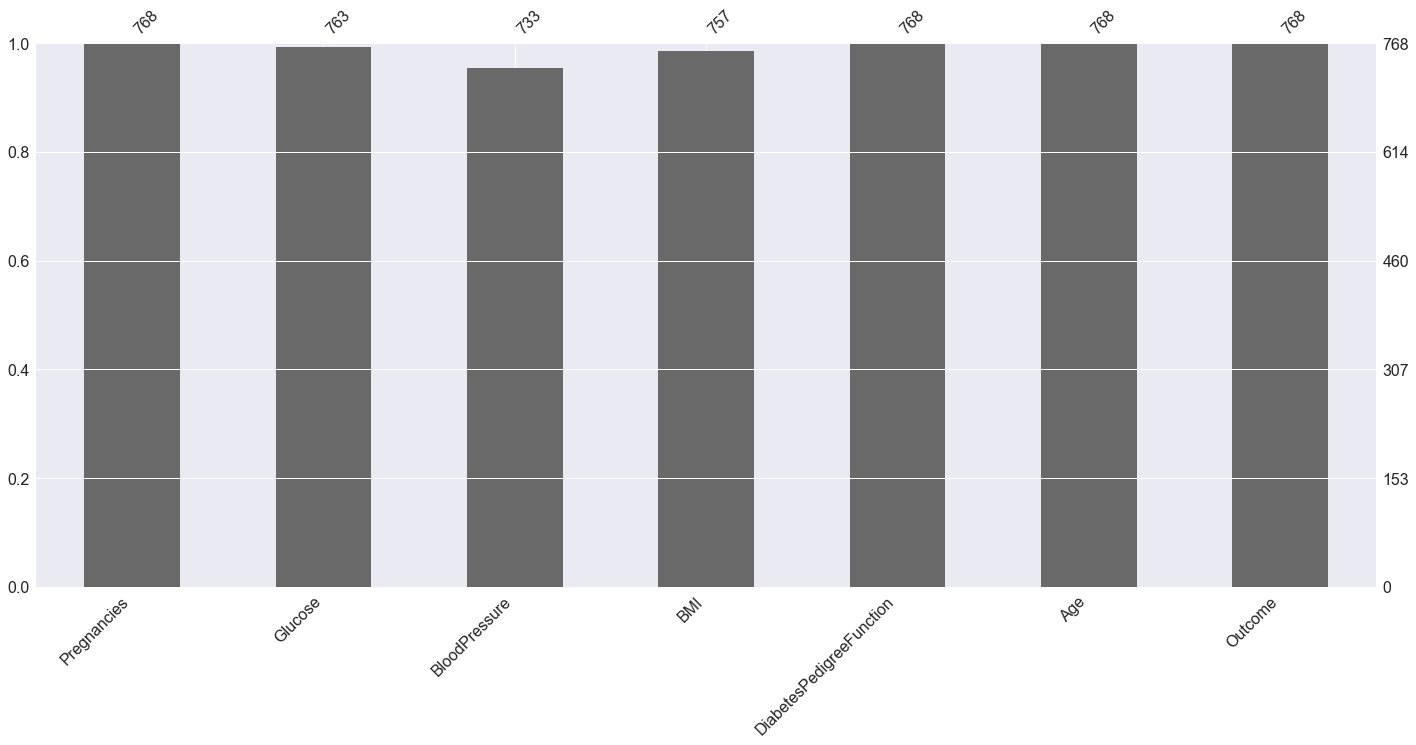

In [64]:
#去掉空值过多列
#空值过多去掉，空值不多可以填充
thresh_count=dia_data.shape[0]*0.8
#若某一列数据缺失数超过0.8可以去掉
dia_data=dia_data.dropna(thresh=thresh_count,axis=1)
p=msno.bar(dia_data)

E:\anaconda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
E:\anaconda\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


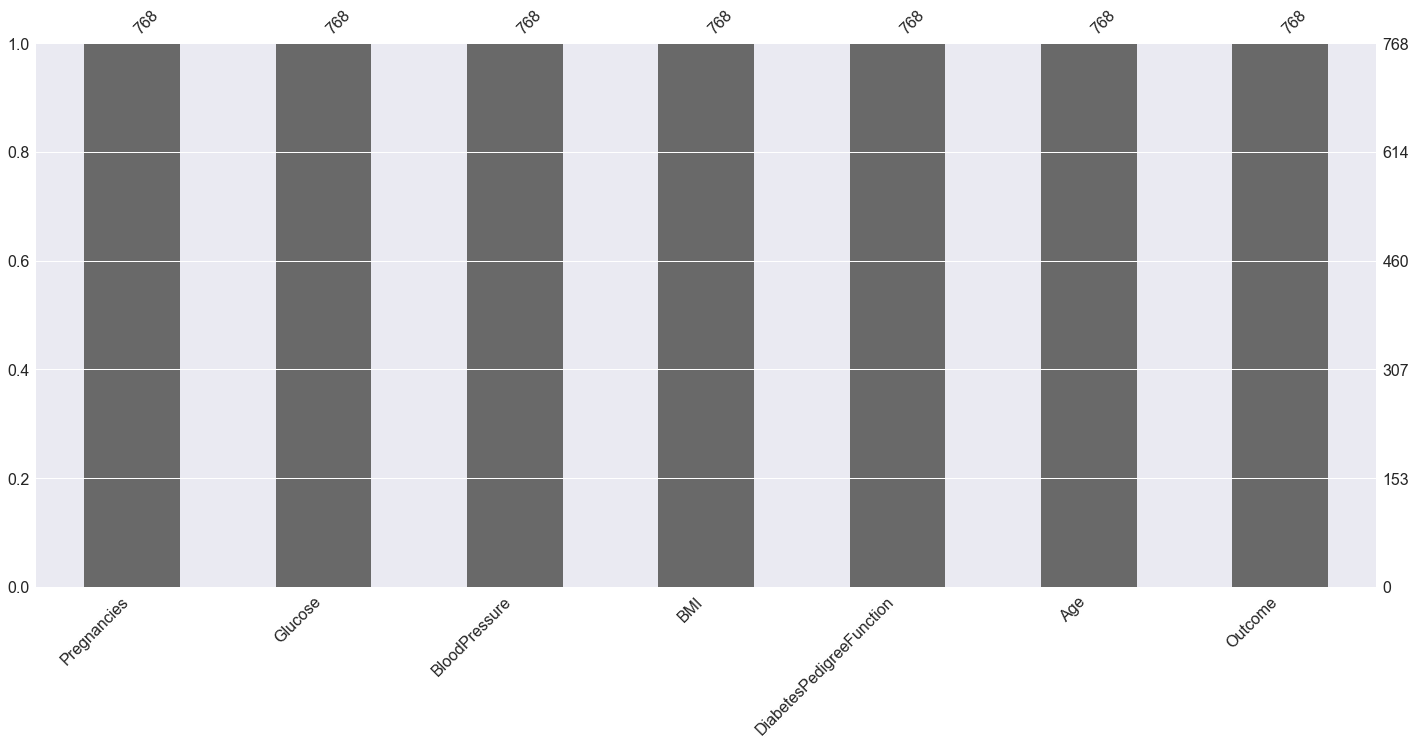

In [65]:
#填充空值
from sklearn.preprocessing import Imputer
#采用均值插补的方式
imr=Imputer(missing_values='NaN',strategy='mean',axis=0)
colume=['Glucose','BloodPressure','BMI']
dia_data[colume]=imr.fit_transform(dia_data[colume])
p=msno.bar(dia_data)

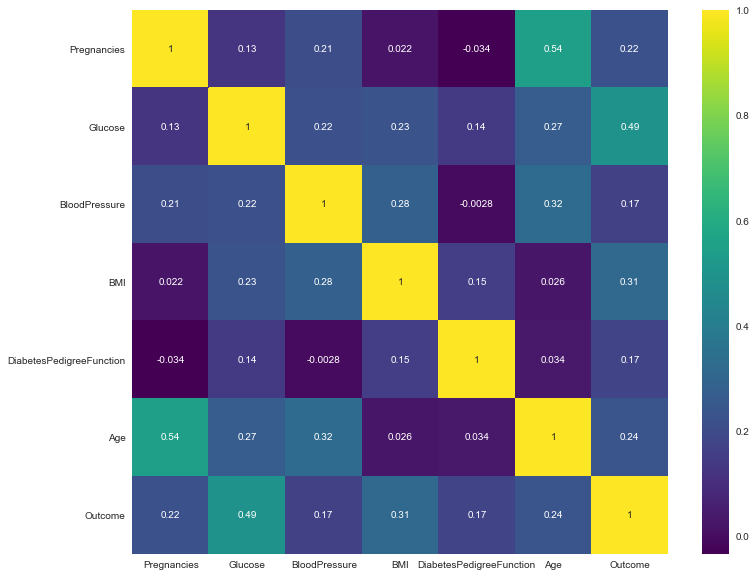

In [68]:
#相关性分析,热力图
#热力图对称，反映相关性
plt.figure(figsize=(12,10))
p=sns.heatmap(dia_data.corr(),annot=True,cmap='viridis')

In [70]:
#数据切分
x=dia_data.drop('Outcome',axis=1)
y=dia_data.Outcome
print(x)
print(y)

     Pregnancies  Glucose  BloodPressure        BMI  DiabetesPedigreeFunction  \
0              6    148.0      72.000000  33.600000                     0.627   
1              1     85.0      66.000000  26.600000                     0.351   
2              8    183.0      64.000000  23.300000                     0.672   
3              1     89.0      66.000000  28.100000                     0.167   
4              0    137.0      40.000000  43.100000                     2.288   
5              5    116.0      74.000000  25.600000                     0.201   
6              3     78.0      50.000000  31.000000                     0.248   
7             10    115.0      72.405184  35.300000                     0.134   
8              2    197.0      70.000000  30.500000                     0.158   
9              8    125.0      96.000000  32.457464                     0.232   
10             4    110.0      92.000000  37.600000                     0.191   
11            10    168.0   

In [77]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,stratify=y)


In [80]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
LR=LogisticRegression()
LR.fit(x_train,y_train)
predictions=LR.predict(x_test)
print(classification_report(y_test,predictions))
print(LR.score(x_test,y_test))

             precision    recall  f1-score   support

          0       0.80      0.85      0.82       150
          1       0.69      0.59      0.64        81

avg / total       0.76      0.76      0.76       231

0.7619047619047619
